### Student Details

Student name: Ashik Kannampilly Janardhanan

Student ID: 25032615

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

In [ ]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [ ]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

Insert your code below.

In [ ]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            z = self.net_input(X)
            output = self.activation(z)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = -np.sum(y * np.log(output) + (1 - y) * np.log(1 - output))
            self.cost_.append(cost)
        return self



    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
      z = np.clip(z, -250, 250)
      return 1.0 / (1.0 + np.exp(-z))



    def predict(self, X):
      return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


In [ ]:
# 1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length (use the provided iris_data.csv file on Brightspace)

# Set Iris-setosa as class 0 and Iris-versicolor as class 1

################################
import pandas as pd

df = pd.read_csv("iris_data.csv")
df.columns = df.columns.str.strip()
df = df[(df['class'] == 'Iris-setosa') | (df['class'] == 'Iris-versicolor')]
X = df[['sepal_length', 'petal_length']].values
y = np.where(df['class'] == 'Iris-setosa', 0, 1)
print(df.head(5))

   sepal_length  sepa_width  petal_length  petal_width        class
0           5.1         3.5           1.4          0.2  Iris-setosa
1           4.9         3.0           1.4          0.2  Iris-setosa
2           4.7         3.2           1.3          0.2  Iris-setosa
3           4.6         3.1           1.5          0.2  Iris-setosa
4           5.0         3.6           1.4          0.2  Iris-setosa


In [ ]:
# 2. Train the algorithm using the default values of eta and epochs

################################
# Your code here
log_reg =LogisticRegressionGD()  # !!! DO NOT CHANGE THE NAME OF THE MODEL !!!
log_reg.train(X, y)

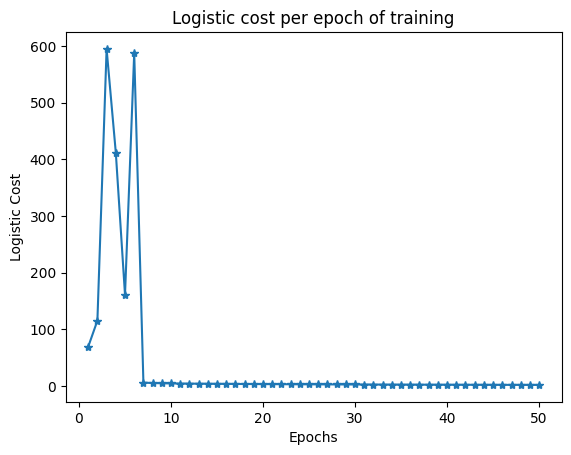

In [ ]:
# 3. Plot the Logistic cost per epoch of training

################################
# Your code here
plt.plot(range(1,51), log_reg.cost_, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Logistic Cost')
plt.title('Logistic cost per epoch of training')
plt.show()


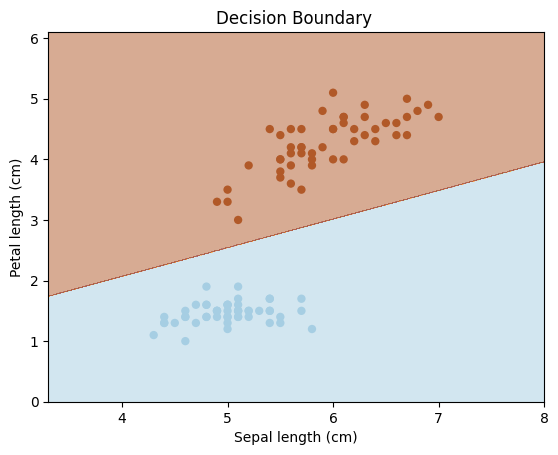

In [ ]:
# 4. Plot the decision boundary using the supplied plot_decision_boundary function

################################
# Your code here
plot_decision_boundary(X, y, log_reg)
plt.title('Decision Boundary ')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.show()

# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

Insert your code below.

In [ ]:
# 1. Load all of the samples from the Iris dataset
import pandas as pd

################################
# Your code here
df=pd.read_csv("iris_data.csv")
df.columns = df.columns.str.strip()
df.groupby('class').size()
print(df.head(5))
x = df[['petal_length', 'petal_width']].values
y = np.where(df['class'] == 'Iris-setosa', 0,np.where(df['class'] == 'Iris-versicolor', 1, 2))

   sepal_length  sepa_width  petal_length  petal_width        class
0           5.1         3.5           1.4          0.2  Iris-setosa
1           4.9         3.0           1.4          0.2  Iris-setosa
2           4.7         3.2           1.3          0.2  Iris-setosa
3           4.6         3.1           1.5          0.2  Iris-setosa
4           5.0         3.6           1.4          0.2  Iris-setosa


In [ ]:
# 2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x,y,test_size=0.3,stratify=y)# !!! DO NOT CHANGE THE NAMES OF THE SPLITS !!!

In [ ]:
# 3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_2)
X_train_scaled_2 = scaler.transform(X_train_2)
X_test_scaled_2 = scaler.transform(X_test_2)
################################


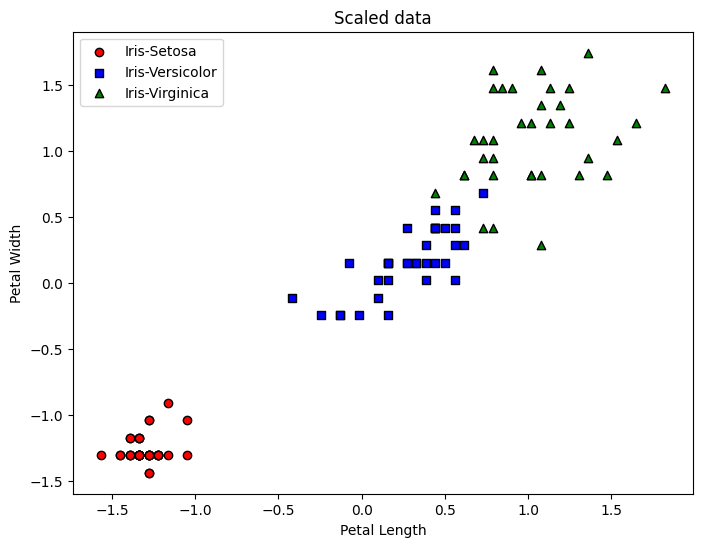

In [ ]:
# Plot the scaled data
plt.figure(figsize=(8,6))
class_name=['Iris-Setosa','Iris-Versicolor','Iris-Virginica']
label_no=[0,1,2]
clr=['red','blue','green']
mrk=['o','s','^']
for label_no, color, marker, label in zip(label_no, clr, mrk,class_name):
    plt.scatter(X_train_scaled_2[y_train_2==label_no, 0],X_train_scaled_2[y_train_2==label_no, 1],color=color,marker=marker,label=label,edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scaled data')
plt.legend()
plt.show()

In [ ]:
# 4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
from sklearn.linear_model import LogisticRegression

################################
# Your code here

sk_log_reg =LogisticRegression()  # !!!USE THE DEFAULT PARAMETERS. DO NOT CHANGE THE NAME OF THE MODEL!!!
sk_log_reg.fit(X_train_scaled_2, y_train_2)

LogisticRegression()

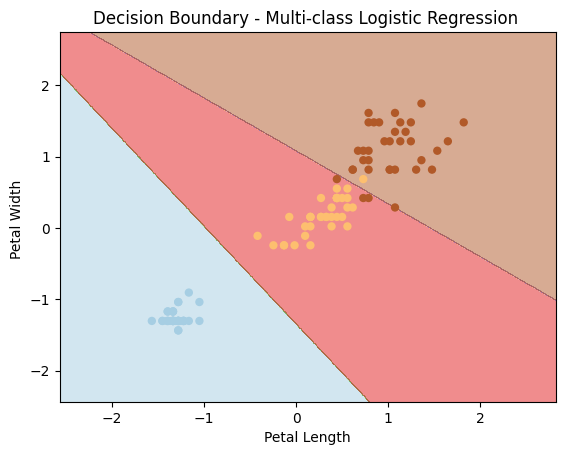

In [ ]:
# 5. Plot the decision boundary using the supplied plot_decision_boundary function
#from plot_decision_boundary import plot_decision_boundary

################################
# Your code here
plot_decision_boundary(X_train_scaled_2, y_train_2, sk_log_reg)

plt.title('Decision Boundary - Multi-class Logistic Regression ')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width ')
plt.show()

In [ ]:
# 6. Using sklearn's accuracy_score, calculate the accuracy score on the test data
from sklearn.metrics import accuracy_score

################################
# Your code here
y_pred_2 = sk_log_reg.predict(X_test_scaled_2)
accuracy_score_2 =accuracy_score(y_test_2, y_pred_2) # !!! DO NOT CHANGE THE NAME OF THE VARIABLE !!!
print(accuracy_score_2)

0.9555555555555556


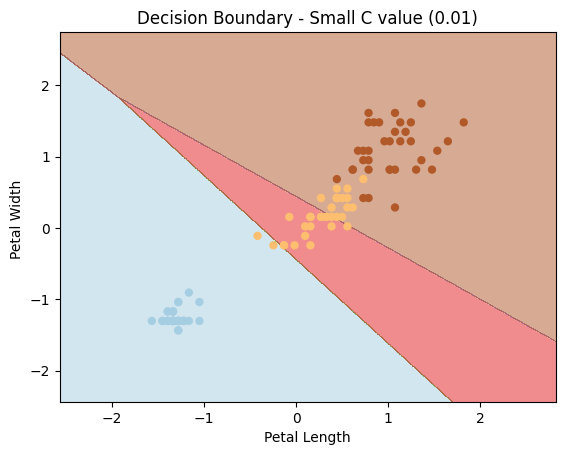

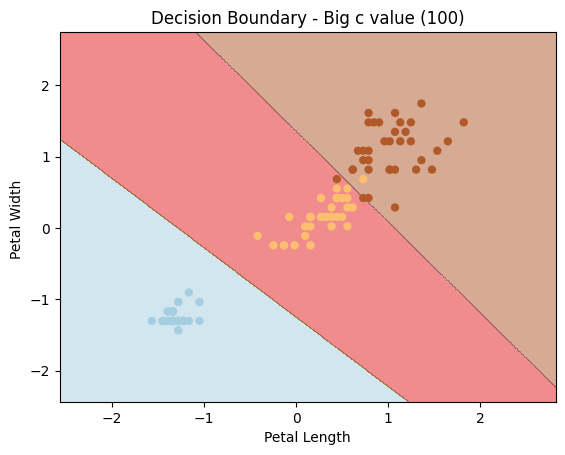

In [ ]:
def plot(x, y, model, title):
    plot_decision_boundary(x, y, model)
    plt.title(title)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width ')
    plt.show()
smallC = LogisticRegression(C=0.01)
smallC.fit(X_train_scaled_2, y_train_2)
plot(X_train_scaled_2, y_train_2,smallC,'Decision Boundary - Small C value (0.01)')

sk_log_reg_largeC = LogisticRegression(C=100)
sk_log_reg_largeC.fit(X_train_scaled_2, y_train_2)
plot(X_train_scaled_2, y_train_2, sk_log_reg_largeC, 'Decision Boundary - Big c value (100)')


What do you observe?

Small C (0.01) : Strong regularization → underfits a little as some points are misclassified.

Default C (1) : good regularization → classfied everything correctly with less misclassification.

Large C (100) : Weak regularization → fully classified every points have chances for overfitting.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Insert your code below.

In [ ]:
# 1. Load all of the samples from the Iris dataset

################################
# Your code here
# 1. Load all of the samples from the Iris dataset
import pandas as pd

################################
# Your code here
df=pd.read_csv("iris_data.csv")
df.columns = df.columns.str.strip()
df.groupby('class').size()
print(df.head(5))
x = df[['petal_length', 'petal_width']].values
y = np.where(df['class'] == 'Iris-setosa', 0,np.where(df['class'] == 'Iris-versicolor', 1, 2))

   sepal_length  sepa_width  petal_length  petal_width        class
0           5.1         3.5           1.4          0.2  Iris-setosa
1           4.9         3.0           1.4          0.2  Iris-setosa
2           4.7         3.2           1.3          0.2  Iris-setosa
3           4.6         3.1           1.5          0.2  Iris-setosa
4           5.0         3.6           1.4          0.2  Iris-setosa


In [ ]:
# 2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
from sklearn.model_selection import train_test_split

################################
# Your code here

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(x,y,test_size=0.3,stratify=y)

In [ ]:
# 3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
from sklearn.preprocessing import StandardScaler

################################
# Your code here
scaler3=StandardScaler()
scaler3.fit(X_train_3)
X_train_scaled_3 =scaler3.transform(X_train_3)  # !!!DO NOT CHANGE NAME!!!
X_test_scaled_3 = scaler3.transform(X_test_3) # !!!DO NOT CHANGE NAME!!!

In [ ]:
# 4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
from sklearn.svm import SVC

################################
# Your code here

svc = SVC(kernel='linear')
svc.fit(X_train_scaled_3, y_train_3)# !!!USE THE DEFAULT PARAMETERS, EXCEPT SET KERNEL TO LINEAR. DO NOT CHANGE THE NAME OF THE MODEL!!!

SVC(kernel='linear')

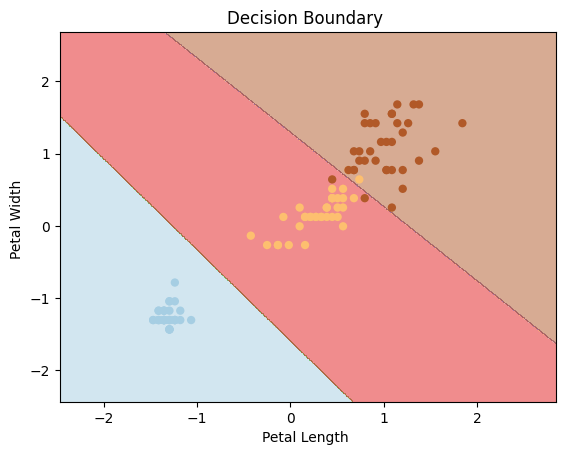

In [ ]:
# 5. Plot the decision boundary using the supplied plot_decision_boundary function

################################
# Your code here
plot_decision_boundary(X_train_scaled_3, y_train_3, svc)
plt.title('Decision Boundary ')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')
plt.show()

In [ ]:
# 6. Using sklearn's accuracy_score, calculate the accuracy score on the test data
from sklearn.metrics import accuracy_score
################################
# Your code here
y_pred_3 = svc.predict(X_test_scaled_3)
accuracy_score_3 =accuracy_score(y_test_3,y_pred_3) # !!! DO NOT CHANGE THE NAME OF THE VARIABLE !!!
print(accuracy_score_3)

0.9555555555555556


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

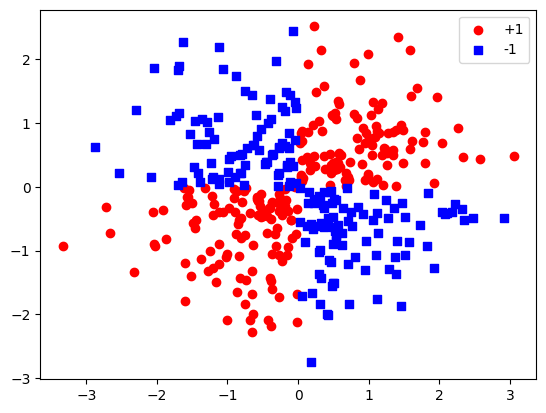

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

Insert your code below.

In [ ]:
# 1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
from sklearn.svm import SVC
################################
# Your code here
svc_4_01 = SVC(kernel='rbf', gamma=0.1) # !!!DO NOT CHANGE THE NAME OF THE MODEL. CHOOSE GAMMA=0.1!!!
svc_4_01.fit(X_r, y_r)

SVC(gamma=0.1)

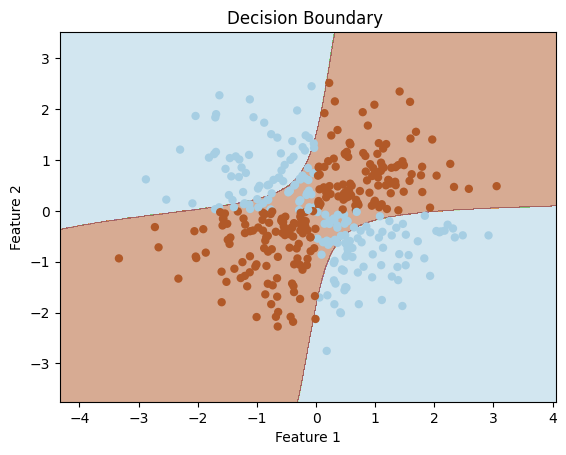

In [ ]:
plot_decision_boundary(X_r, y_r, svc_4_01)
plt.title('Decision Boundary ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


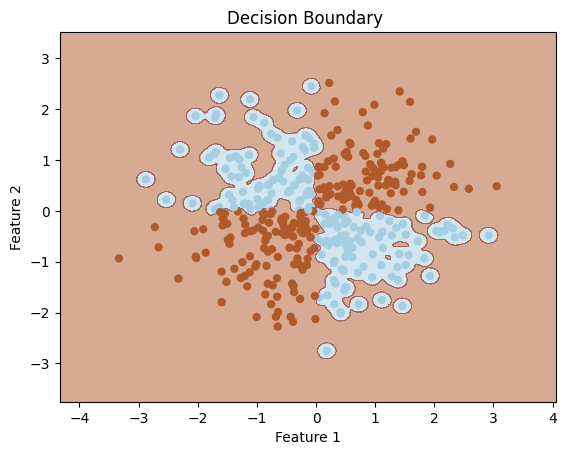

In [ ]:
# 3. Change the gamma value to 100.

################################
# Your code here
svc_4_100 = SVC(kernel='rbf', gamma=100) # !!!DO NOT CHANGE THE NAME OF THE MODEL. CHOOSE GAMMA=100!!!
svc_4_100.fit(X_r, y_r)
plot_decision_boundary(X_r, y_r, svc_4_100)
plt.title('Decision Boundary ')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



**Discuss**: What happens? What is the problem with this result? Describe what is happening based on the resources given in the activity.
Small gamma (0.1) :smooth decision boundary → underfits some patterns and misclassify points near the boundary.

Large gamma (100) : irregular shaped boundary → overfits the training data, may perform poorly on unseen data.

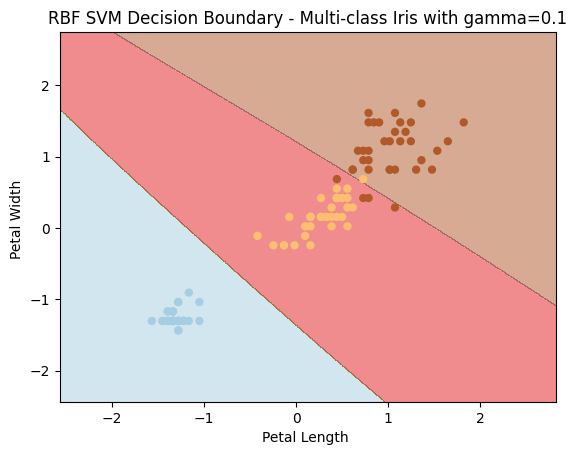

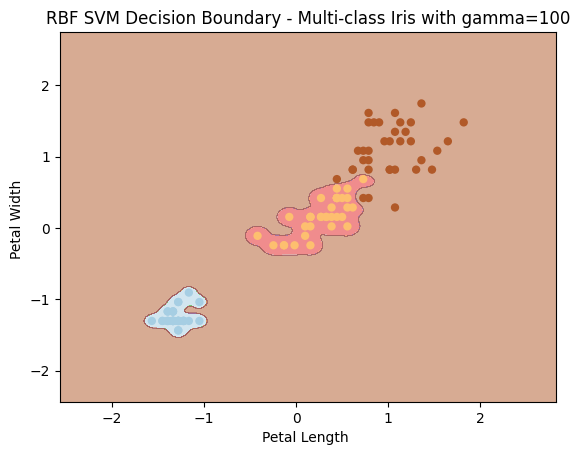

In [ ]:
# 4. Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

################################
# Your code here
svc_iris_01 = SVC(kernel='rbf', gamma=0.1)
svc_iris_01.fit(X_train_scaled_2, y_train_2)
plot_decision_boundary(X_train_scaled_2, y_train_2, svc_iris_01)
plt.title('RBF SVM Decision Boundary - Multi-class Iris with gamma=0.1')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')
plt.show()

svc_iris_100 = SVC(kernel='rbf', gamma=100)
svc_iris_100.fit(X_train_scaled_2, y_train_2)
plot_decision_boundary(X_train_scaled_2, y_train_2, svc_iris_100)
plt.title('RBF SVM Decision Boundary - Multi-class Iris with gamma=100')
plt.xlabel('Petal Length ')
plt.ylabel('Petal Width ')
plt.show()


